# Week 1 homework

In [1]:
ls -lh

total 296
-rw-r--r--  1 chekwei  staff   1.2K 22 May 22:16 README.md
drwxr-xr-x  4 chekwei  staff   128B 22 May 22:32 data/
-rw-r--r--  1 chekwei  staff   1.3K 24 May 19:42 homework_week_1.md
-rw-r--r--  1 chekwei  staff   138K 23 May 19:31 week1_notebook.ipynb


In [2]:
import pandas as pd

## Question 1

In [3]:
df = pd.read_parquet("data/fhv_tripdata_2021-01.parquet")

In [4]:
df.head(4)

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037


In [6]:
df.dtypes

dispatching_base_num              object
pickup_datetime           datetime64[ns]
dropOff_datetime          datetime64[ns]
PUlocationID                     float64
DOlocationID                     float64
SR_Flag                           object
Affiliated_base_number            object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154112 entries, 0 to 1154111
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   dispatching_base_num    1154112 non-null  object        
 1   pickup_datetime         1154112 non-null  datetime64[ns]
 2   dropOff_datetime        1154112 non-null  datetime64[ns]
 3   PUlocationID            195845 non-null   float64       
 4   DOlocationID            991892 non-null   float64       
 5   SR_Flag                 0 non-null        object        
 6   Affiliated_base_number  1153227 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 61.6+ MB


## Question 2

In [8]:
df[0:1]

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009


In [9]:
# df[df["dispatching_base_num"]=="B00009"]
df[0:1]["dropOff_datetime"] - df[0:1]["pickup_datetime"]

0   0 days 00:17:00
dtype: timedelta64[ns]

In [10]:
df["travel_duration"] = df["dropOff_datetime"] - df["pickup_datetime"]

In [11]:
df["travel_duration"] = df["travel_duration"].apply(lambda td: td.total_seconds()/60)

In [12]:
df["travel_duration"].mean()

19.167224093791006

## Data Preparation

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df.drop(df[df.travel_duration > 60].index, inplace=True)
df.drop(df[df.travel_duration < 1].index, inplace=True)

In [15]:
df["travel_duration"].max()

60.0

In [16]:
df["travel_duration"].min()

1.0

/opt/homebrew/Caskroom/miniforge/base/envs/mlops_zoomcamp/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='travel_duration', ylabel='Density'>

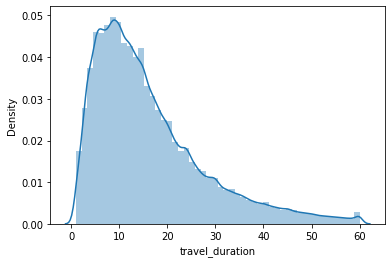

In [17]:
sns.distplot(df["travel_duration"])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1109826 entries, 0 to 1154111
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   dispatching_base_num    1109826 non-null  object        
 1   pickup_datetime         1109826 non-null  datetime64[ns]
 2   dropOff_datetime        1109826 non-null  datetime64[ns]
 3   PUlocationID            182818 non-null   float64       
 4   DOlocationID            961919 non-null   float64       
 5   SR_Flag                 0 non-null        object        
 6   Affiliated_base_number  1109053 non-null  object        
 7   travel_duration         1109826 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 76.2+ MB


## Question 3

In [18]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending= False, inplace=True)

In [19]:
missing_value_df

,column_name,percent_missing
SR_Flag,SR_Flag,100.000000
PUlocationID,PUlocationID,83.527328
DOlocationID,DOlocationID,13.327044
Affiliated_base_number,Affiliated_base_number,0.069651
dispatching_base_num,dispatching_base_num,0.000000
pickup_datetime,pickup_datetime,0.000000
dropOff_datetime,dropOff_datetime,0.000000
travel_duration,travel_duration,0.000000


## Question 4

In [20]:
df_tmp = df[["PUlocationID", "DOlocationID", "travel_duration"]]
df_tmp

,PUlocationID,DOlocationID,travel_duration
0,NaN,NaN,17.000000
1,NaN,NaN,17.000000
3,NaN,72.0,8.283333
4,NaN,61.0,15.216667
5,NaN,71.0,9.050000
...,...,...,...
1154107,7.0,7.0,8.750000
1154108,44.0,91.0,57.600000
1154109,171.0,171.0,16.200000
1154110,15.0,15.0,19.433333


In [21]:
df_fill_na = df_tmp.fillna(-1)
df_fill_na

,PUlocationID,DOlocationID,travel_duration
0,-1.0,-1.0,17.000000
1,-1.0,-1.0,17.000000
3,-1.0,72.0,8.283333
4,-1.0,61.0,15.216667
5,-1.0,71.0,9.050000
...,...,...,...
1154107,7.0,7.0,8.750000
1154108,44.0,91.0,57.600000
1154109,171.0,171.0,16.200000
1154110,15.0,15.0,19.433333


In [94]:
df_fill_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1109826 entries, 0 to 1154111
Data columns (total 3 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   PUlocationID     1109826 non-null  object 
 1   DOlocationID     1109826 non-null  object 
 2   travel_duration  1109826 non-null  float64
dtypes: float64(1), object(2)
memory usage: 66.1+ MB


In [95]:
from sklearn.feature_extraction import DictVectorizer
categorical = ['PUlocationID', 'DOlocationID']
numerical = ['travel_duration']
# df_fill_na[categorical] = df_fill_na[categorical].astype(str)

In [96]:
train_dicts = df_fill_na[categorical].to_dict('records')
dict_vect = DictVectorizer()
X_train = dict_vect.fit_transform(train_dicts)

In [98]:
X_train.shape

(1109826, 525)

## Question 5 - Using DictVectorizer

In [105]:
X_train.shape

(1109826, 525)

In [104]:
y_train = df_fill_na.travel_duration
y_train.shape

(1109826,)

In [107]:
from sklearn.linear_model import LinearRegression
ln_reg = LinearRegression()

ln_reg.fit(X_train, y_train)
y_train_pred = ln_reg.predict(X_train)

In [108]:
# we now have the y_pred_train, and we will use that to compare with the ground truth
# which is also the y_value

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_train, y_train_pred))
rmse

10.528519421155469

## Question 6

In [109]:
# using the model we have above, we will now predict on unseen data from Feb 2021
"""
Steps:
1. create y_value which is travel_duration
2. replace missing pick up and drop off location with -1
3. one-hot encode pick up and drop off location
4. ignore the rest of the features
4a. only keep records between 1-60 mins
5. predict
6. get model metrics
"""
df_feb = pd.read_parquet("data/fhv_tripdata_2021-02.parquet")

In [110]:
df_feb["travel_duration"] = df_feb["dropOff_datetime"] - df_feb["pickup_datetime"]
df_feb["travel_duration"] = df_feb["travel_duration"].apply(lambda td: td.total_seconds()/60)

In [111]:
df_feb.drop(df_feb[df_feb.travel_duration > 60].index, inplace=True)
df_feb.drop(df_feb[df_feb.travel_duration < 1].index, inplace=True)

In [112]:
df_feb.isna()["travel_duration"].sum()

0

In [113]:
df_feb_fill_na = df_feb.fillna(-1)
df_feb_fill_na.head(5)

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,travel_duration
1,B00021,2021-02-01 00:55:40,2021-02-01 01:06:20,173.0,82.0,-1,B00021,10.666667
2,B00021,2021-02-01 00:14:03,2021-02-01 00:28:37,173.0,56.0,-1,B00021,14.566667
3,B00021,2021-02-01 00:27:48,2021-02-01 00:35:45,82.0,129.0,-1,B00021,7.950000
4,B00037,2021-02-01 00:12:50,2021-02-01 00:26:38,-1.0,225.0,-1,B00037,13.800000
5,B00037,2021-02-01 00:00:37,2021-02-01 00:09:35,-1.0,61.0,-1,B00037,8.966667


In [114]:
df_feb_fill_na = df_feb_fill_na[["PUlocationID", "DOlocationID", "travel_duration"]]

In [115]:
categorical = ['PUlocationID', 'DOlocationID']
numerical = ['travel_duration']

test_dicts = df_feb_fill_na[categorical].to_dict('records')
X_test = dict_vect.transform(test_dicts)

In [116]:
y_test = df_feb_fill_na.travel_duration

In [117]:
X_test.shape

(990113, 525)

In [119]:
y_test.shape

(990113,)

In [120]:
y_test_pred = ln_reg.predict(X_test)

In [121]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_test_pred))
rmse

12.853254920195765